In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandasql as psql
pd.set_option('display.max_columns',None)
                        

In [2]:
# Load the general dataset

iris = pd.read_csv(r"C:\Users\sruth\Downloads\Iris.csv", header=0)

# Copy to back-uo file

iris_01 = iris.copy()

# Display first 5 records

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [5]:
iris['Species']=iris['Species'].str.replace('Iris-setosa','0')
iris['Species']=iris['Species'].str.replace('Iris-versicolor','1')
iris['Species']=iris['Species'].str.replace('Iris-virginica','2')


iris['Species']=iris['Species'].astype(int)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [6]:
iris.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [7]:
#display null values and missing values

iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
#identify the independent and target variables
 
iris_dup=iris[iris.duplicated(keep='last')]

#display the duplicate records

iris_dup

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [9]:
#display information

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int32  
dtypes: float64(4), int32(1), int64(1)
memory usage: 6.6 KB


In [10]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


In [11]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [12]:
# identify independent and target variable
IndepVar=[]
for col in iris.columns:
    if col!="Species":
        IndepVar.append(col)
TargetVar="Species"

x=iris[IndepVar]
y=iris[TargetVar]

In [13]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Display the shape for train & test datasets

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((105, 5), (45, 5), (105,), (45,))

In [15]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

# KNN algortihm

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Print Class: 0
TP=19, FN=0, TN=26, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Print Class: 1
TP=13, FN=0, TN=32, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Print Class: 2
TP=13, FN=0, TN=32, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Overall Performance Prediction:
Accuracy: 100.0%
Precision: 100.0%
Recall or Sensitivity: 100.0%
F1-Score: 1.0
Specificity or True Nagative Rate: 100.0%
Balanced Accuracy: 100.0%

MCC: 1.0

roc_auc_score: 1.0


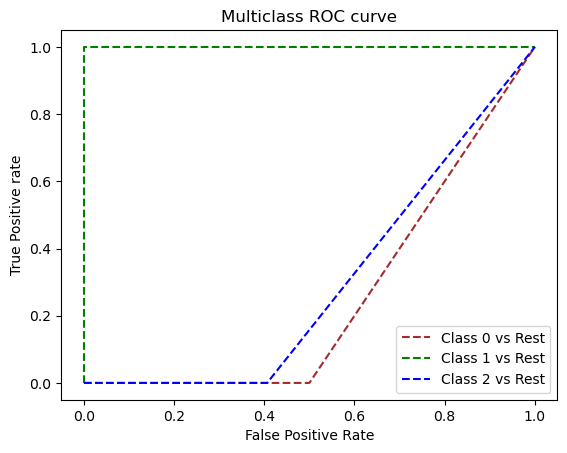

In [16]:
# To build the 'Multinominal Logistic Regression' model with random sampling

from sklearn.neighbors import KNeighborsClassifier

# Create an object for model

KN  = KNeighborsClassifier()

# Train the model with training data

KN = KN.fit(x_train,y_train)

# Predict the model with test data set

y_pred = KN.predict(x_test)
y_pred_prob = KN.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-2

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,1], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))



#-----------------------------------------------------------------------------------------------------------------------------------------------------

# Decision Tree

[[19  1  0]
 [ 0 12  0]
 [ 0  0 13]]
Print Class: 0
TP=19, FN=1, TN=25, FP=0
Accuracy: 0.978
Precision: 1.0
Sensitivity: 0.95
F1-Score: 0.974
Specificity: 1.0
Balanced Accuracy: 0.975
MCC: 0.956

Print Class: 1
TP=12, FN=0, TN=32, FP=1
Accuracy: 0.978
Precision: 0.923
Sensitivity: 1.0
F1-Score: 0.96
Specificity: 0.97
Balanced Accuracy: 0.985
MCC: 0.946

Print Class: 2
TP=13, FN=0, TN=32, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Overall Performance Prediction:
Accuracy: 98.5333%
Precision: 97.4333%
Recall or Sensitivity: 98.3333%
F1-Score: 0.978
Specificity or True Nagative Rate: 99.0%
Balanced Accuracy: 98.6667%

MCC: 0.9673

roc_auc_score: 0.981


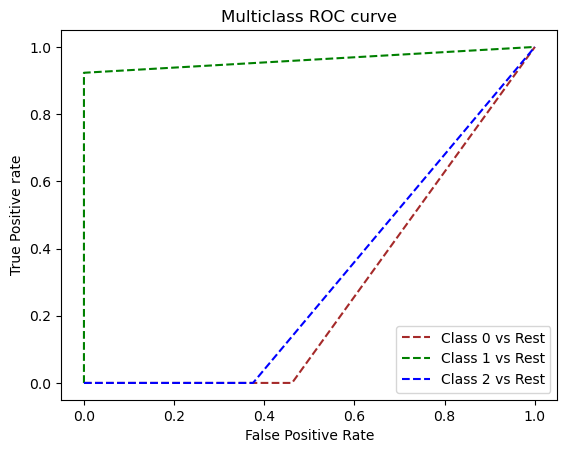

In [17]:
# To build the 'Multinominal Logistic Regression' model with random sampling

from sklearn.tree import DecisionTreeClassifier

# Create an object for model

MHealthDT = DecisionTreeClassifier()

# Train the model with training data

MHealthDT = MHealthDT.fit(x_train,y_train)

# Predict the model with test data set

y_pred = MHealthDT.predict(x_test)
y_pred_prob = MHealthDT.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-2

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,1], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))



#-----------------------------------------------------------------------------------------------------------------------------------------------------

# Random Forest

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Print Class: 0
TP=19, FN=0, TN=26, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Print Class: 1
TP=13, FN=0, TN=32, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Print Class: 2
TP=13, FN=0, TN=32, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Overall Performance Prediction:
Accuracy: 100.0%
Precision: 100.0%
Recall or Sensitivity: 100.0%
F1-Score: 1.0
Specificity or True Nagative Rate: 100.0%
Balanced Accuracy: 100.0%

MCC: 1.0

roc_auc_score: 1.0


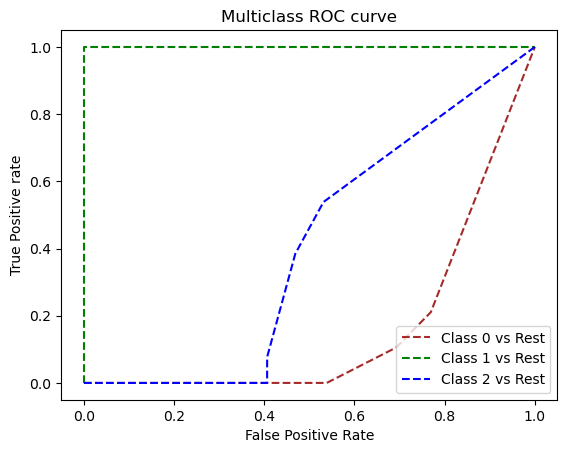

In [18]:
# To build the 'Multinominal Logistic Regression' model with random sampling

from sklearn.ensemble import RandomForestClassifier

# Create an object for model

MHealthRF = RandomForestClassifier()

# Train the model with training data

MHealthRF = MHealthRF.fit(x_train,y_train)

# Predict the model with test data set

y_pred = MHealthRF.predict(x_test)
y_pred_prob = MHealthRF.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-2

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,1], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))



#-----------------------------------------------------------------------------------------------------------------------------------------------------

# Extra Trees

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Print Class: 0
TP=19, FN=0, TN=26, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Print Class: 1
TP=13, FN=0, TN=32, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Print Class: 2
TP=13, FN=0, TN=32, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Overall Performance Prediction:
Accuracy: 100.0%
Precision: 100.0%
Recall or Sensitivity: 100.0%
F1-Score: 1.0
Specificity or True Nagative Rate: 100.0%
Balanced Accuracy: 100.0%

MCC: 1.0

roc_auc_score: 1.0


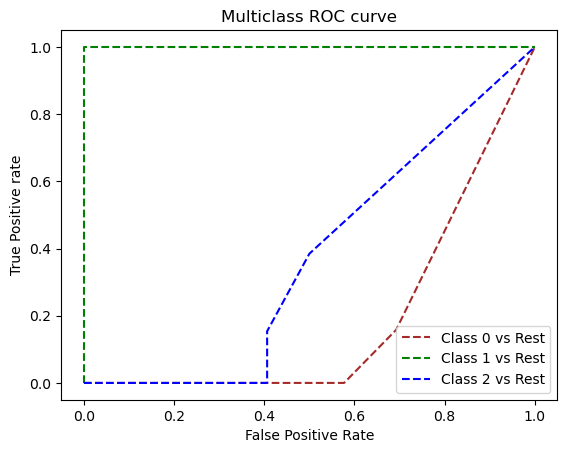

In [19]:
# To build the 'Multinominal Logistic Regression' model with random sampling

from sklearn.ensemble import ExtraTreesClassifier

# Create an object for model

MHealthET = ExtraTreesClassifier()

# Train the model with training data

MHealthET = MHealthET.fit(x_train,y_train)

# Predict the model with test data set

y_pred = MHealthET.predict(x_test)
y_pred_prob = MHealthET.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-2

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,1], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))



#-----------------------------------------------------------------------------------------------------------------------------------------------------

# SVM

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Print Class: 0
TP=19, FN=0, TN=26, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Print Class: 1
TP=13, FN=0, TN=32, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Print Class: 2
TP=13, FN=0, TN=32, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Overall Performance Prediction:
Accuracy: 100.0%
Precision: 100.0%
Recall or Sensitivity: 100.0%
F1-Score: 1.0
Specificity or True Nagative Rate: 100.0%
Balanced Accuracy: 100.0%

MCC: 1.0

roc_auc_score: 1.0


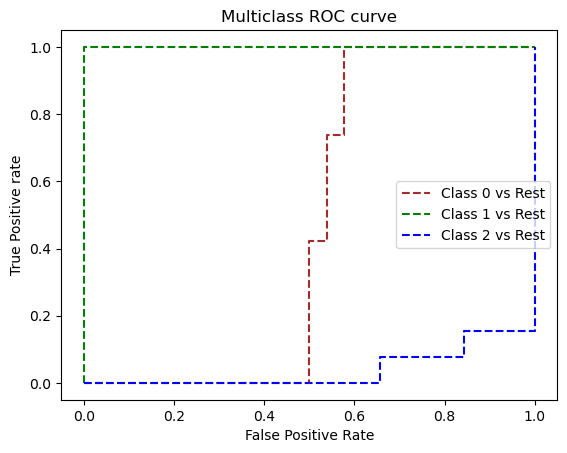

In [20]:
# To build the 'Multinominal Logistic Regression' model with random sampling

from sklearn.svm import SVC

# Create an object for model

SVM  = SVC(probability=True)

# Train the model with training data

SVM = SVM.fit(x_train,y_train)

# Predict the model with test data set

y_pred = SVM.predict(x_test)
y_pred_prob = SVM.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-2

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,1], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))



#-----------------------------------------------------------------------------------------------------------------------------------------------------

In [22]:
EMResults=pd.read_csv(r"C:\Users\sruth\Downloads\EMResults.csv",header=0)
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  DecisionTreeClassifier()
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Print Class: 0
TP=19, FN=0, TN=26, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Print Class: 1
TP=13, FN=0, TN=32, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Print Class: 2
TP=13, FN=0, TN=32, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Overall Performance Prediction:
Accuracy: 100.0%
Precision: 100.0%
Recall or Sensitivity: 100.0%
F1-Score: 1.0
Specificity or True Nagative Rate: 100.0%
Balanced Accuracy: 100.0%

MCC: 1.0

roc_auc_score: 1.0
-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Print Class: 0
TP=19, FN=0, TN=26, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-

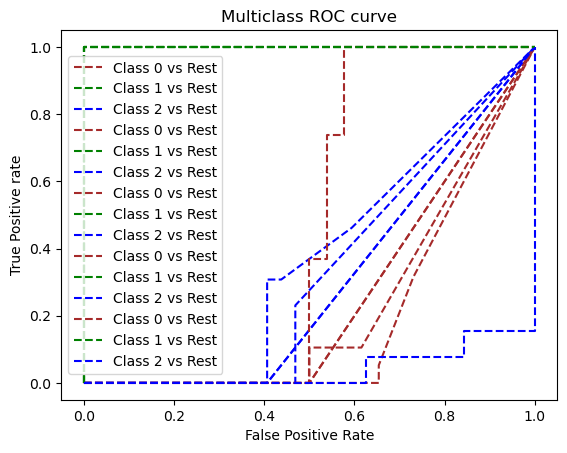

In [23]:

# Build the Calssification models and compare the results

#from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Create objects of classification algorithms with default hyper-parameters

#ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
#ModelGNB = GaussianNB()
ModelSVM = SVC(probability=True)

# Evalution matrix for all the algorithms

#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM]
MM = [ModelDC, ModelRF, ModelET,ModelKNN, ModelSVM]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    
    # confusion matrix in sklearn

    from sklearn.metrics import multilabel_confusion_matrix
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from math import sqrt

    print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

    # Actual and predicted classes

    lst_actual_class = y_test
    lst_predicted_class = y_pred
    lst_predicted_prob_class = y_pred_prob

    # Class = Label 0-12

    lst_classes = [0, 1, 2]

    # Compute multi-class confusion matrix

    arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

    # Temp store results

    model_acc = [];
    model_recall = [];
    model_prec = [];
    model_fscore = [];
    model_spec = [];
    model_bal_acc = [];
    model_mcc = [];
    for no_class in range(len(lst_classes)):
        arr_data = arr_out_matrix[no_class];
        print("Print Class: {0}".format(no_class));

        tp = arr_data[1][1]
        fn = arr_data[0][1]
        tn = arr_data[0][0]
        fp = arr_data[1][0]
    
        sensitivity = round(tp/(tp+fn), 3);
        specificity = round(tn/(tn+fp), 3);
        accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
        balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
        precision = round(tp/(tp+fp), 3);
        f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
        mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
        MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
        model_acc.append(accuracy);
        model_prec.append(precision);
        model_recall.append(sensitivity);
        model_fscore.append(f1Score);
        model_spec.append(specificity);
        model_bal_acc.append(balanced_accuracy);
        model_mcc.append(MCC);
    
        print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
        print("Accuracy: {0}".format(accuracy));    # Accuracy score
        print("Precision: {0}".format(precision)); # Precision score
        print("Sensitivity: {0}".format(sensitivity)); # Recall score
        print("F1-Score: {0}".format(f1Score)); # F1 score
        print("Specificity: {0}".format(specificity)); # True Nagative Rate
        print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
        print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
    from statistics import mean
    import math

    print("Overall Performance Prediction:");
    print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
    print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
    print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
    print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
    print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
    print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
    print("MCC: {0}\n".format(round(mean(model_mcc), 4)))


    # ROC curve for Multi classes 
    from sklearn.multiclass import OneVsRestClassifier
    from sklearn.metrics import roc_curve, roc_auc_score

    fpr = {}
    tpr = {}
    thresh ={}

    n_class = 3

    for i in range(n_class):    
        fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,1], pos_label=i)
    
    # plotting    
    plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
    plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
    plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

    print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', average='weighted'),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [24]:
EMResults.head(10)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,DecisionTreeClassifier(),13,0,0,32,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,"(DecisionTreeClassifier(max_features='sqrt', r...",13,0,0,32,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,"(ExtraTreeClassifier(random_state=1924130022),...",13,0,0,32,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,KNeighborsClassifier(),13,0,0,32,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,SVC(probability=True),13,0,0,32,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [25]:
#Selected the RandomForest as best model because, it gave me the best results

y_predRF=ModelRF.predict(x_test)

In [26]:
#Merging the Predicted data to the main dataset

Results=pd.DataFrame({'Species_A':y_test,'Species_P':y_pred})

ResultsFinal=iris_01.merge(Results,left_index=True,right_index=True)

ResultsFinal.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_A,Species_P
18,19,5.7,3.8,1.7,0.3,Iris-setosa,0,0
51,52,6.4,3.2,4.5,1.5,Iris-versicolor,1,1
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2,2
26,27,5.0,3.4,1.6,0.4,Iris-setosa,0,0
142,143,5.8,2.7,5.1,1.9,Iris-virginica,2,2
